In [5]:
# open a file as csv without header

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,natsort


In [6]:
# imagenet_target_dir ='/mydata/pytorch_custom_log_one_epoch_imagenet_dataset/'
imagenet_target_dir ='/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results'
# synthetic_target_dir ='/mydata/pytorch_custom_log_one_epoch_synthetic_dataset/'
sort_criteria = 'name' # or 'duration'

In [7]:
# sort_by = 'name' or 'duration'
def plotter_preprocessing_time(target_dir,sort_by='name',fig_size=(50,10),remove_outliers=True,fig_prefix=''):
    
    root_to_files = {}
    for root, dirs, files in os.walk(target_dir):
        root_to_files[root] = files
    roots = sorted(root_to_files, key=lambda x: natsort.natsort_key(x.lower()))

    prev_batch = None
    for root in roots:
        print(root)
        files = root_to_files[root]
        plot_df = pd.DataFrame()
        
        for file in files:
            if not file.startswith('custom_log_worker_pid_'):
                continue

            df = pd.read_csv(os.path.join(root, file)
                            , header=None)

            # add header
            df.columns = ['name','start_ts','duration']

            # names that start with 'SBatchPreprocessed'
            df = df[df['name'].str.startswith('SBatchPreprocessed')]
            # map 'SBatchPreprocessed_' such that 'SBatchPreprocessed_idx' becomes 'idx' where idx is an integer
            df['name'] = df['name'].map(lambda x: int(x.replace('SBatchPreprocessed_','')))


            # divide by 1000 to convert from nanoseconds to microseconds
            df['duration'] = df['duration']/1000

            # concatentate all dataframes
            plot_df = pd.concat([plot_df, df])
        
        if plot_df.empty:
            continue
        def remove_wild_outliers(plot_df):
            # mean and std before removing outliers
            mean = np.mean(plot_df["duration"])
            std = np.std(plot_df["duration"])
            print (f'Before removing outliers:')
            print(f'avg = {mean:.2f} usecs, std = {std:.2f} ({100*std/mean:.2f}% of avg) usecs , min = {plot_df["duration"].min():.2f} usecs, max = {plot_df["duration"].max():.2f} usecs')
            # remove rows with duration's > mean - 2*std and < mean + 2*std
            plot_df = plot_df[plot_df['duration'] < plot_df['duration'].mean() + 2*plot_df['duration'].std()]
            plot_df = plot_df[plot_df['duration'] > plot_df['duration'].mean() - 2*plot_df['duration'].std()] 
            # mean and std after removing outliers
            print (f'After removing outliers:')
            return plot_df

        batch = root.split('/')[-1].split('b')[1].split('_')[0] # <long_dir_path> -> 128_gpu4 -> 128

        label = root.split('/')[-1] # retrieves b128_gpu4 kind of label
        print(f'{label}:')
        # remove outliers
        if remove_outliers:
            plot_df = remove_wild_outliers(plot_df)

        if prev_batch is None:
            prev_batch = batch 
        elif batch != prev_batch:

            # plt.figure(figsize=fig_size)
            plt.gcf().set_size_inches(fig_size[0], fig_size[1])
            # label x axis
            plt.xlabel(f'Batch ids preprocessed (sorted by {sort_by}) (batch size = {prev_batch})')
            # label y axis
            plt.ylabel('Batch preprocessing elapsed time in usecs')
            plt.legend()
            
            plt.show()
            prev_batch = batch            
        
        mean = np.mean(plot_df["duration"])
        std = np.std(plot_df["duration"])
        print (f'avg = {mean:.2f} usecs, std = {std:.2f} ({100*std/mean:.2f}% of avg) usecs, min = {plot_df["duration"].min():.2f} usecs, max = {plot_df["duration"].max():.2f} usecs')
        plot_df = plot_df.sort_values(by=[sort_by])
        plt.plot(plot_df['name'], plot_df['duration'], label=label, marker='s')
        # plot on log scale
        plt.yscale('log')

    # plt.figure(figsize=fig_size)
    plt.gcf().set_size_inches(fig_size[0], fig_size[1])
    # label x axis
    plt.xlabel(f'Batch ids preprocessed (sorted by {sort_by})')
    # label y axis
    plt.ylabel('Batch preprocessing elapsed time in usecs')
    plt.legend()    
    plt.show()



/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b128_gpu1
b128_gpu1:
Before removing outliers:
avg = 2811941.01 usecs, std = 422910.64 (15.04% of avg) usecs , min = 1656897.89 usecs, max = 23847927.57 usecs
After removing outliers:
avg = 2810517.72 usecs, std = 281767.06 (10.03% of avg) usecs, min = 2195862.07 usecs, max = 3657082.86 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b128_gpu2
b128_gpu2:
Before removing outliers:
avg = 2558498.60 usecs, std = 310607.62 (12.14% of avg) usecs , min = 306300.24 usecs, max = 4427252.66 usecs
After removing outliers:
avg = 2553633.69 usecs, std = 250349.47 (9.80% of avg) usecs, min = 1981752.44 usecs, max = 3179686.18 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b128_gpu3
b128_gpu3:
Before removing outliers:
avg = 2473508.47 usecs, std = 311107.69 (12.58% of avg) usecs , min = 213995.38 usecs, max = 482

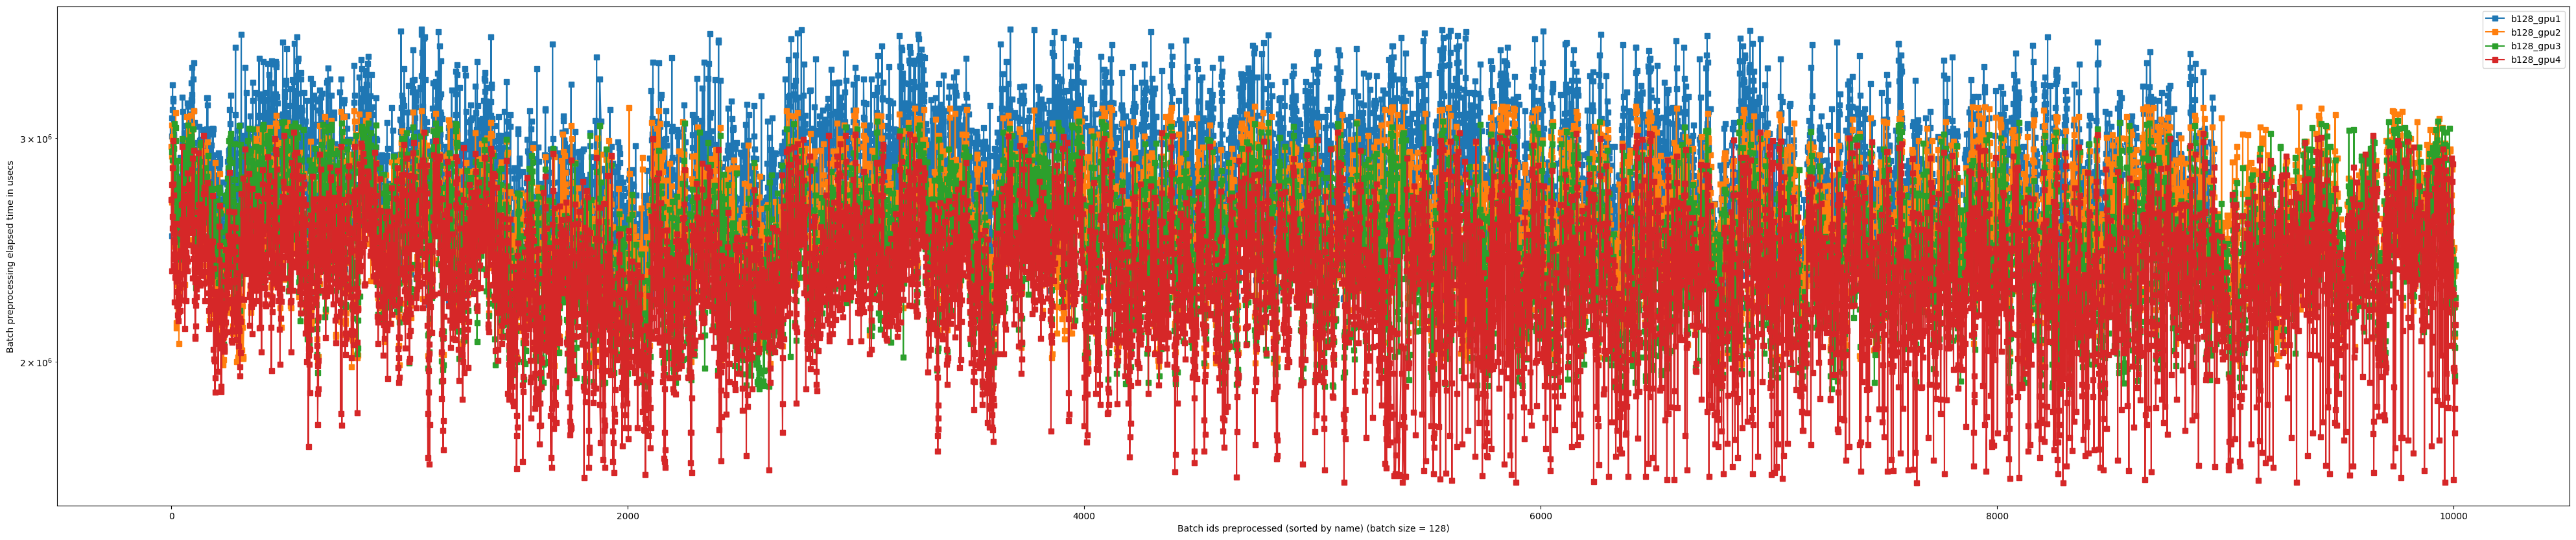

avg = 5181130.12 usecs, std = 485555.66 (9.37% of avg) usecs, min = 3917024.22 usecs, max = 6425684.83 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b256_gpu2
b256_gpu2:
Before removing outliers:
avg = 4970966.36 usecs, std = 506162.13 (10.18% of avg) usecs , min = 2441999.24 usecs, max = 8746877.03 usecs
After removing outliers:
avg = 4968024.82 usecs, std = 410251.06 (8.26% of avg) usecs, min = 4030832.11 usecs, max = 5982977.05 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b256_gpu3
b256_gpu3:
Before removing outliers:
avg = 4831570.58 usecs, std = 519412.23 (10.75% of avg) usecs , min = 2322237.95 usecs, max = 8719739.66 usecs
After removing outliers:
avg = 4826108.78 usecs, std = 425444.57 (8.82% of avg) usecs, min = 3862394.64 usecs, max = 5867161.56 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b256_gpu4
b256_gpu4:
Before removing outliers:
avg = 4803274.98 usecs, std = 731402.10 (15.23% of avg) 

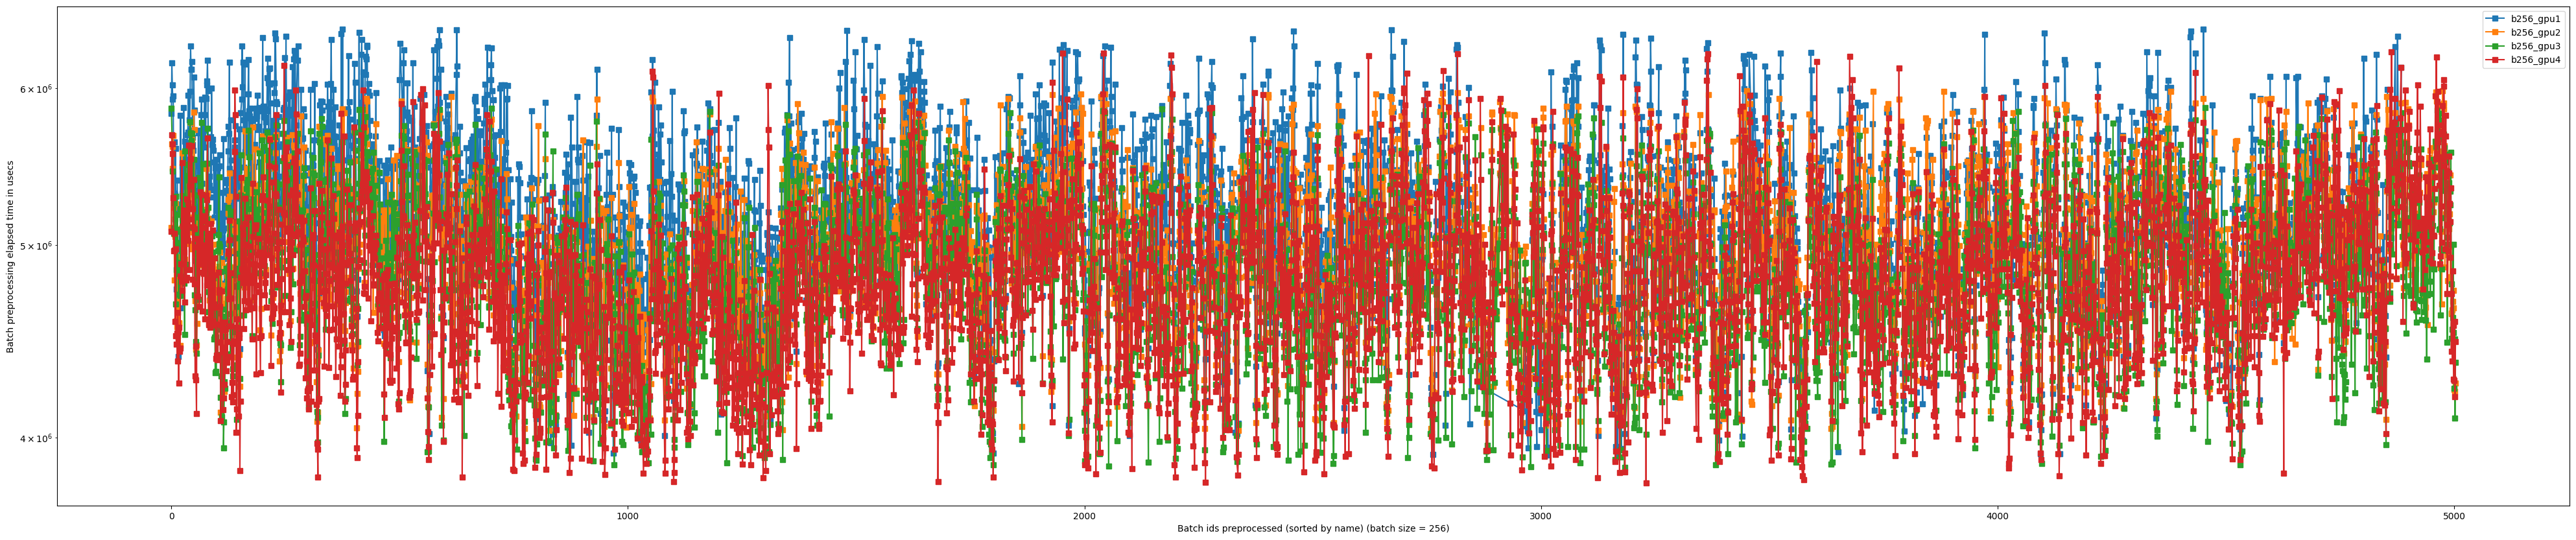

avg = 10338119.44 usecs, std = 854597.07 (8.27% of avg) usecs, min = 8194597.79 usecs, max = 12447178.07 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b512_gpu2
b512_gpu2:
Before removing outliers:
avg = 9988863.18 usecs, std = 919508.50 (9.21% of avg) usecs , min = 2513229.00 usecs, max = 14609877.54 usecs
After removing outliers:
avg = 9989649.26 usecs, std = 768243.48 (7.69% of avg) usecs, min = 8245871.31 usecs, max = 11827121.47 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b512_gpu3
b512_gpu3:
Before removing outliers:
avg = 9559423.75 usecs, std = 924832.83 (9.67% of avg) usecs , min = 2465797.62 usecs, max = 13806352.40 usecs
After removing outliers:
avg = 9545132.56 usecs, std = 753514.24 (7.89% of avg) usecs, min = 7835398.28 usecs, max = 11389555.36 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b512_gpu4
b512_gpu4:
Before removing outliers:
avg = 9159242.35 usecs, std = 1598844.43 (17.46% of 

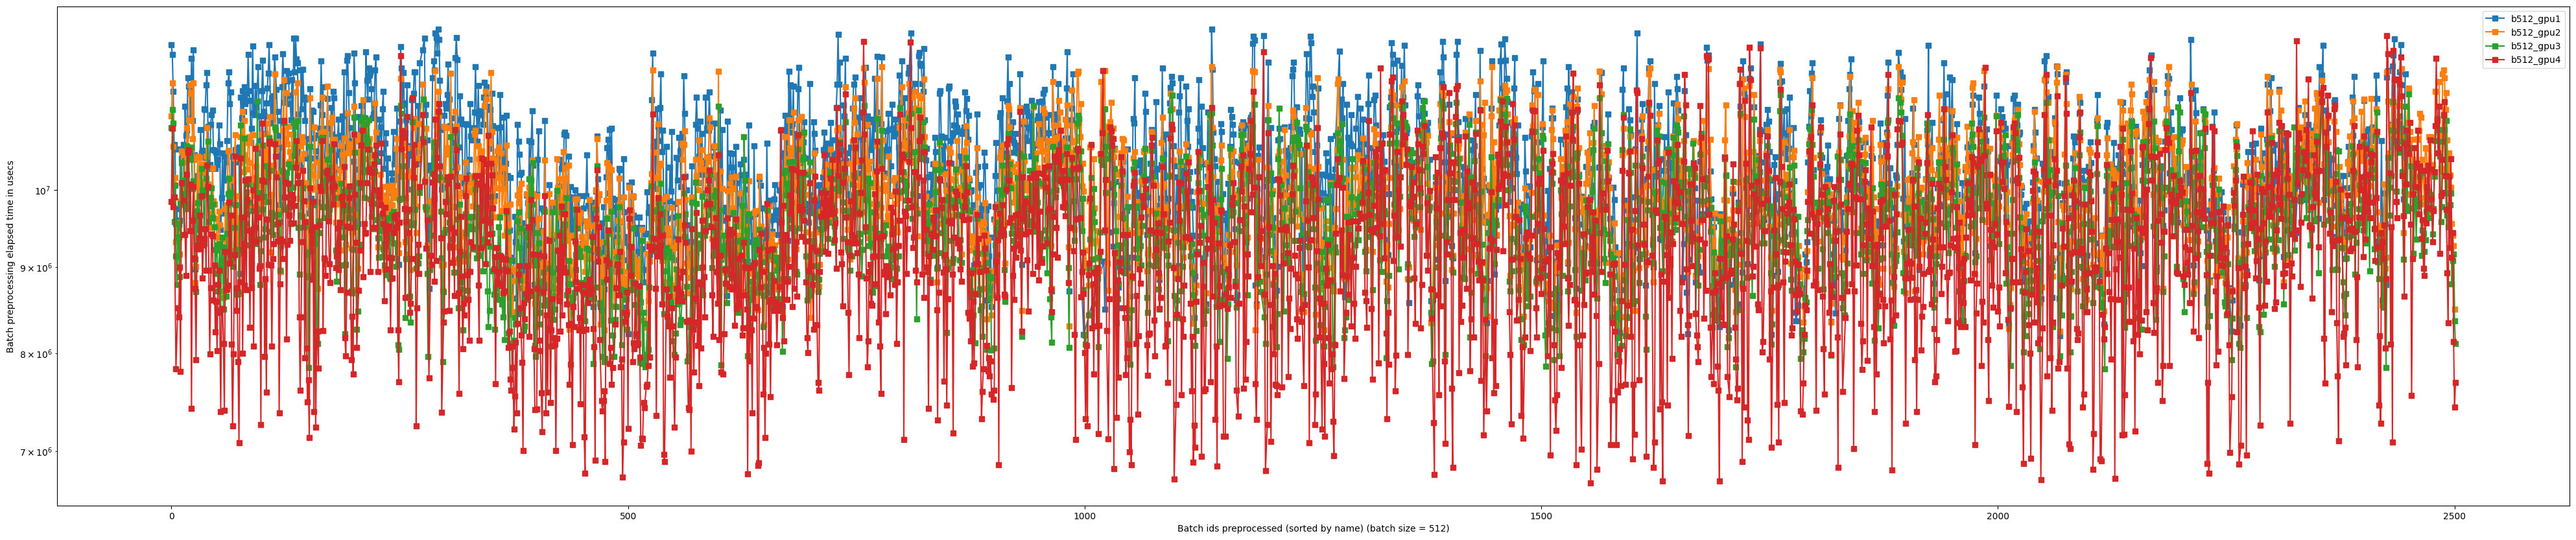

avg = 20367265.68 usecs, std = 1492989.19 (7.33% of avg) usecs, min = 16721916.31 usecs, max = 24004318.89 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b1024_gpu2
b1024_gpu2:
Before removing outliers:
avg = 20144912.66 usecs, std = 1701530.91 (8.45% of avg) usecs , min = 2624959.95 usecs, max = 25888739.57 usecs
After removing outliers:
avg = 20136760.28 usecs, std = 1382686.67 (6.87% of avg) usecs, min = 16919509.20 usecs, max = 23522825.35 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b1024_gpu3
b1024_gpu3:
Before removing outliers:
avg = 16893489.21 usecs, std = 3099126.82 (18.35% of avg) usecs , min = 2072094.78 usecs, max = 25039920.91 usecs
After removing outliers:
avg = 16897010.88 usecs, std = 2991708.06 (17.71% of avg) usecs, min = 11009965.10 usecs, max = 22957045.67 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b1024_gpu4
b1024_gpu4:
Before removing outliers:
avg = 18435717.48 usecs, std = 2

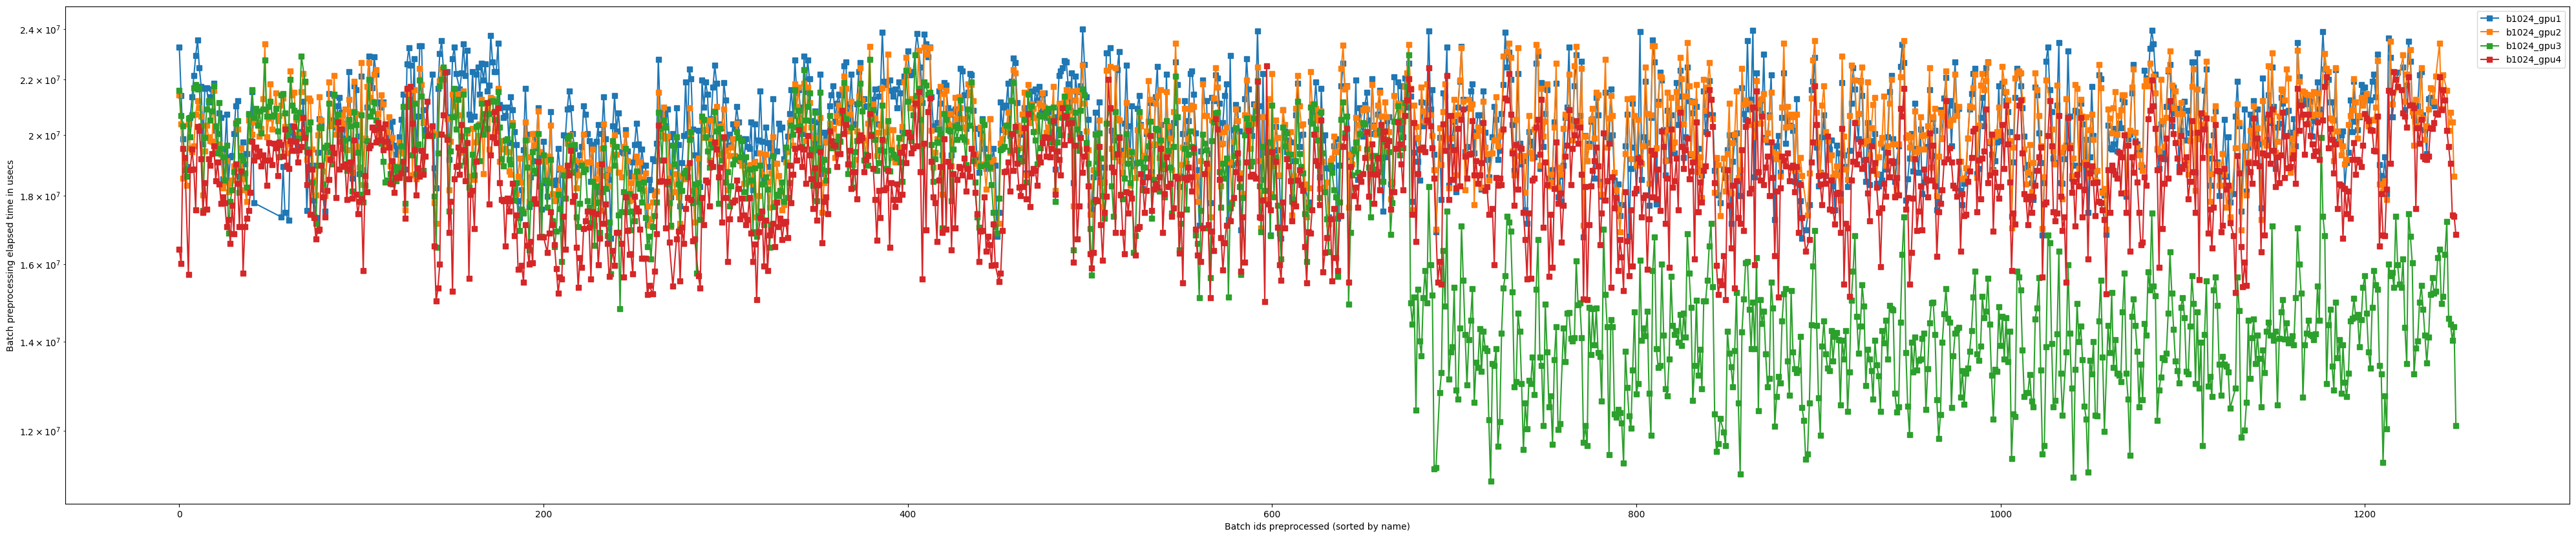

In [8]:
plotter_preprocessing_time(imagenet_target_dir,sort_by=sort_criteria,remove_outliers=True)

In [ ]:
plotter_preprocessing_time(synthetic_target_dir,sort_by=sort_criteria,fig_size=(20,10),remove_outliers=False,fig_prefix='synthetic')

In [9]:
# sort_by = 'name' or 'duration'
def plotter_preprocessing_wait_time(target_dir,sort_by='name',fig_size=(50,10),fig_prefix=''):
    plt.figure(figsize=fig_size)
    root_to_files = {}
    for root, dirs, files in os.walk(target_dir):
        root_to_files[root] = files
    roots = sorted(root_to_files, key=lambda x: natsort.natsort_key(x.lower()))
    
    prev_batch = None
    
    for root in roots:
        print (root)
        files = root_to_files[root]
        plot_df = pd.DataFrame()
        for file in files:
            if not file.startswith('custom_log_main_pid_'):
                continue

            df = pd.read_csv(os.path.join(root, file)
                            , header=None)

            # add header
            df.columns = ['name','start_ts','duration']

            # names that start with 'SBatchWait'
            df = df[df['name'].str.startswith('SBatchWait')]

            # map 'SBatchWait' such that 'SBatchWait_idx' becomes 'idx' where idx is an integer
            df['name'] = df['name'].map(lambda x: int(x.replace('SBatchWait_','')))

            # divide by 1000 to convert from nanoseconds to microseconds
            df['duration'] = df['duration']/1000

            # concatentate all dataframes
            plot_df = pd.concat([plot_df, df])
        
        if plot_df.empty:
            continue

        label = root.split('/')[-1] # retrieves b128_gpu4 kind of label
        batch = root.split('/')[-1].split('b')[1].split('_')[0] # <long_dir_path> -> 128_gpu4 -> 128

        print(f'{label}:')

        if prev_batch is None:
            prev_batch = batch 
        elif batch != prev_batch:

            # plt.figure(figsize=fig_size)
            plt.gcf().set_size_inches(fig_size[0], fig_size[1])
            # label x axis
            plt.xlabel(f'Batch ids preprocessed (sorted by {sort_by}) (batch size = {prev_batch})')
            # label y axis
            plt.ylabel('Batch preprocessing elapsed time in usecs')
            plt.legend()
            
            plt.show()
            prev_batch = batch 

        mean = np.mean(plot_df["duration"])
        std = np.std(plot_df["duration"])
        minimum = plot_df["duration"].min()
        maximum = plot_df["duration"].max() 
        print (f'avg = {mean:.2f} usecs, std = {std:.2f} ({100*std/mean:.2f}% of avg) usecs, min = {minimum:.2f} usecs, max = {maximum:.2f} usecs')
        # print % of batches which had very low wait time given by 100 usecs pretty print
        print (f'{100*len(plot_df[plot_df["duration"] < 100])/len(plot_df):.2f}% of batches had wait time < {100} usecs')
        
        # sort by sort_by
        plot_df = plot_df.sort_values(by=[sort_by])
        plt.plot(plot_df['name'], plot_df['duration'], label=label)

        # plt.scatter(plot_df['name'], plot_df['duration'], label=label)
        # plot on log scale
        plt.yscale('log')

    plt.gcf().set_size_inches(fig_size[0], fig_size[1])
    # label x axis
    plt.xlabel(f'Wait time for batch ids preprocessed (sorted by {sort_by})')
    # label y axis
    plt.ylabel('Batch wait time in usecs')
    plt.legend()
    plt.show()


/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b128_gpu1
b128_gpu1:
avg = 2459184.38 usecs, std = 427290.22 (17.38% of avg) usecs, min = 32.21 usecs, max = 23501482.98 usecs
0.03% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b128_gpu2
b128_gpu2:
avg = 1083860.67 usecs, std = 759845.44 (70.11% of avg) usecs, min = 1.00 usecs, max = 3612585.97 usecs
14.70% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b128_gpu3
b128_gpu3:
avg = 682098.42 usecs, std = 777826.31 (114.03% of avg) usecs, min = 1.00 usecs, max = 3866636.65 usecs
39.31% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b128_gpu4
b128_gpu4:
avg = 476761.19 usecs, std = 670037.26 (140.54% of avg) usecs, min = 1.00 usecs, max = 3529357.50 usecs
51.17% of batches had wait 

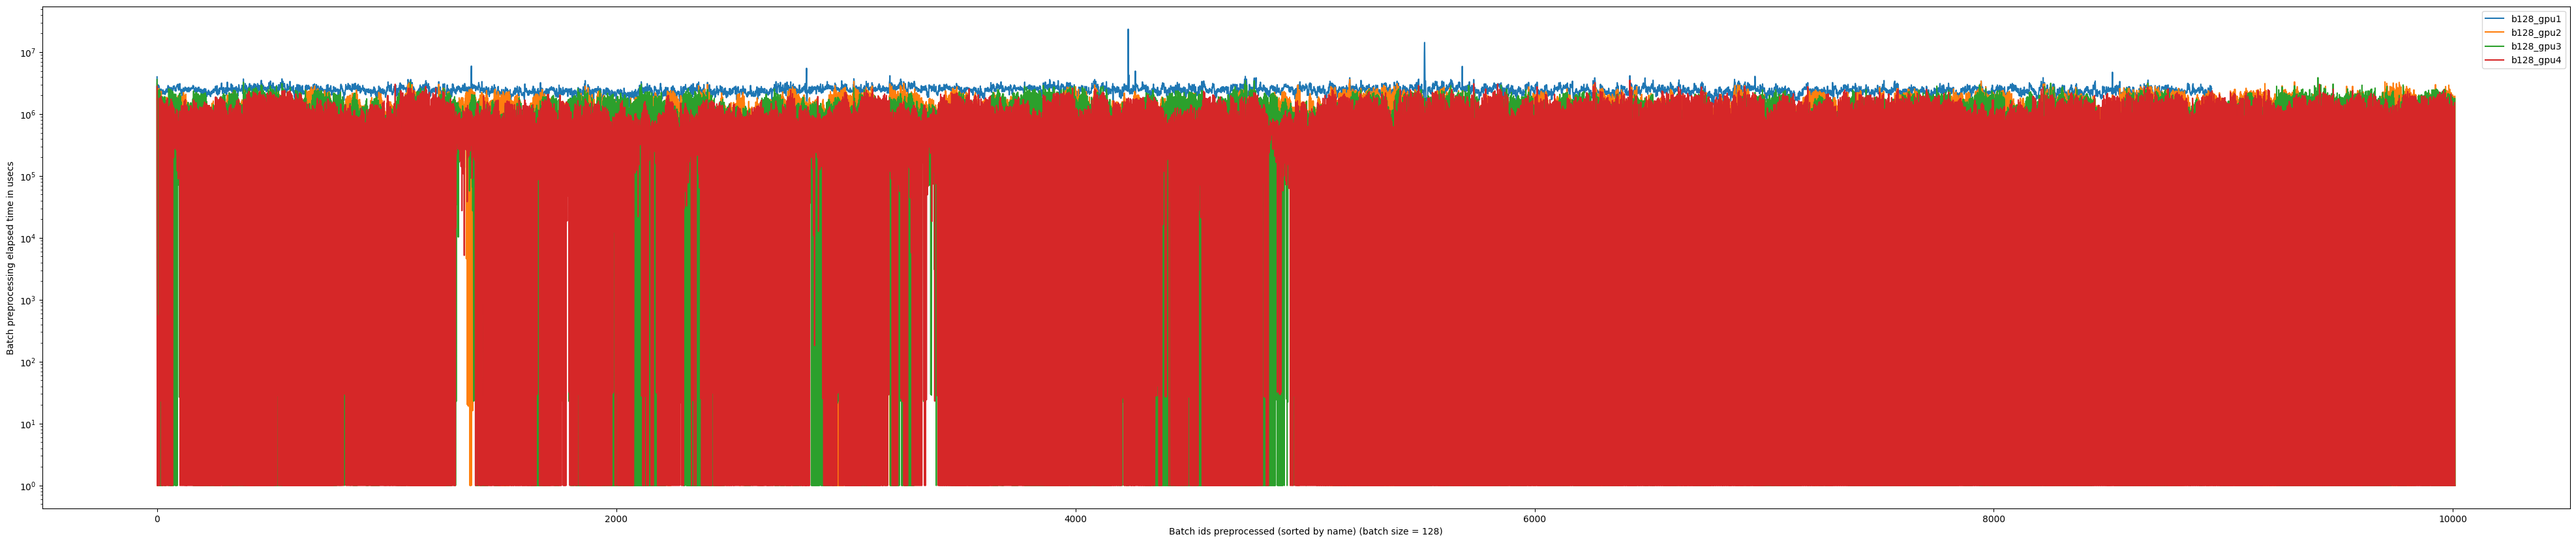

avg = 4432745.28 usecs, std = 642566.27 (14.50% of avg) usecs, min = 1569913.36 usecs, max = 8278609.00 usecs
0.00% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b256_gpu2
b256_gpu2:
avg = 2059520.54 usecs, std = 1530863.95 (74.33% of avg) usecs, min = 1.00 usecs, max = 6301623.01 usecs
17.20% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b256_gpu3
b256_gpu3:
avg = 1340106.24 usecs, std = 1427767.86 (106.54% of avg) usecs, min = 1.00 usecs, max = 6144591.15 usecs
33.01% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b256_gpu4
b256_gpu4:
avg = 952487.61 usecs, std = 1196324.41 (125.60% of avg) usecs, min = 1.00 usecs, max = 13262550.88 usecs
42.42% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b512_gpu1
b512_gpu1:


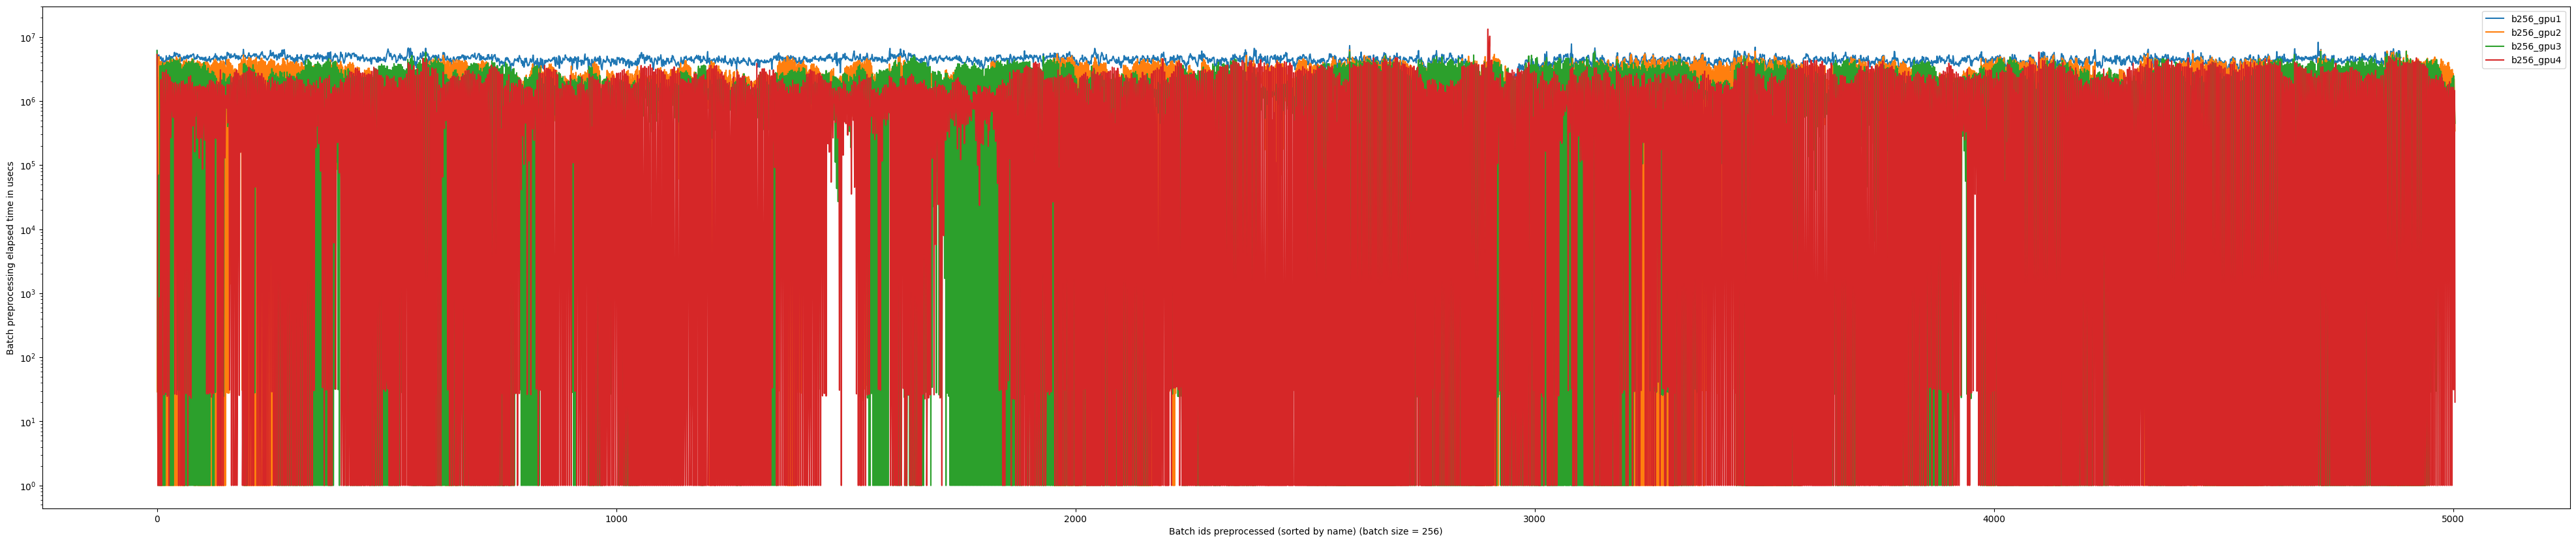

avg = 8671029.33 usecs, std = 1092567.94 (12.60% of avg) usecs, min = 3003546.97 usecs, max = 13129654.08 usecs
0.00% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b512_gpu2
b512_gpu2:
avg = 4228764.81 usecs, std = 2864759.32 (67.74% of avg) usecs, min = 1.00 usecs, max = 11517232.21 usecs
11.71% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b512_gpu3
b512_gpu3:
avg = 2567446.72 usecs, std = 3088793.90 (120.31% of avg) usecs, min = 1.00 usecs, max = 11309549.05 usecs
46.50% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b512_gpu4
b512_gpu4:
avg = 1849939.26 usecs, std = 2704218.67 (146.18% of avg) usecs, min = 1.00 usecs, max = 29920898.82 usecs
55.81% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b1024_gpu1
b1024_gpu1:


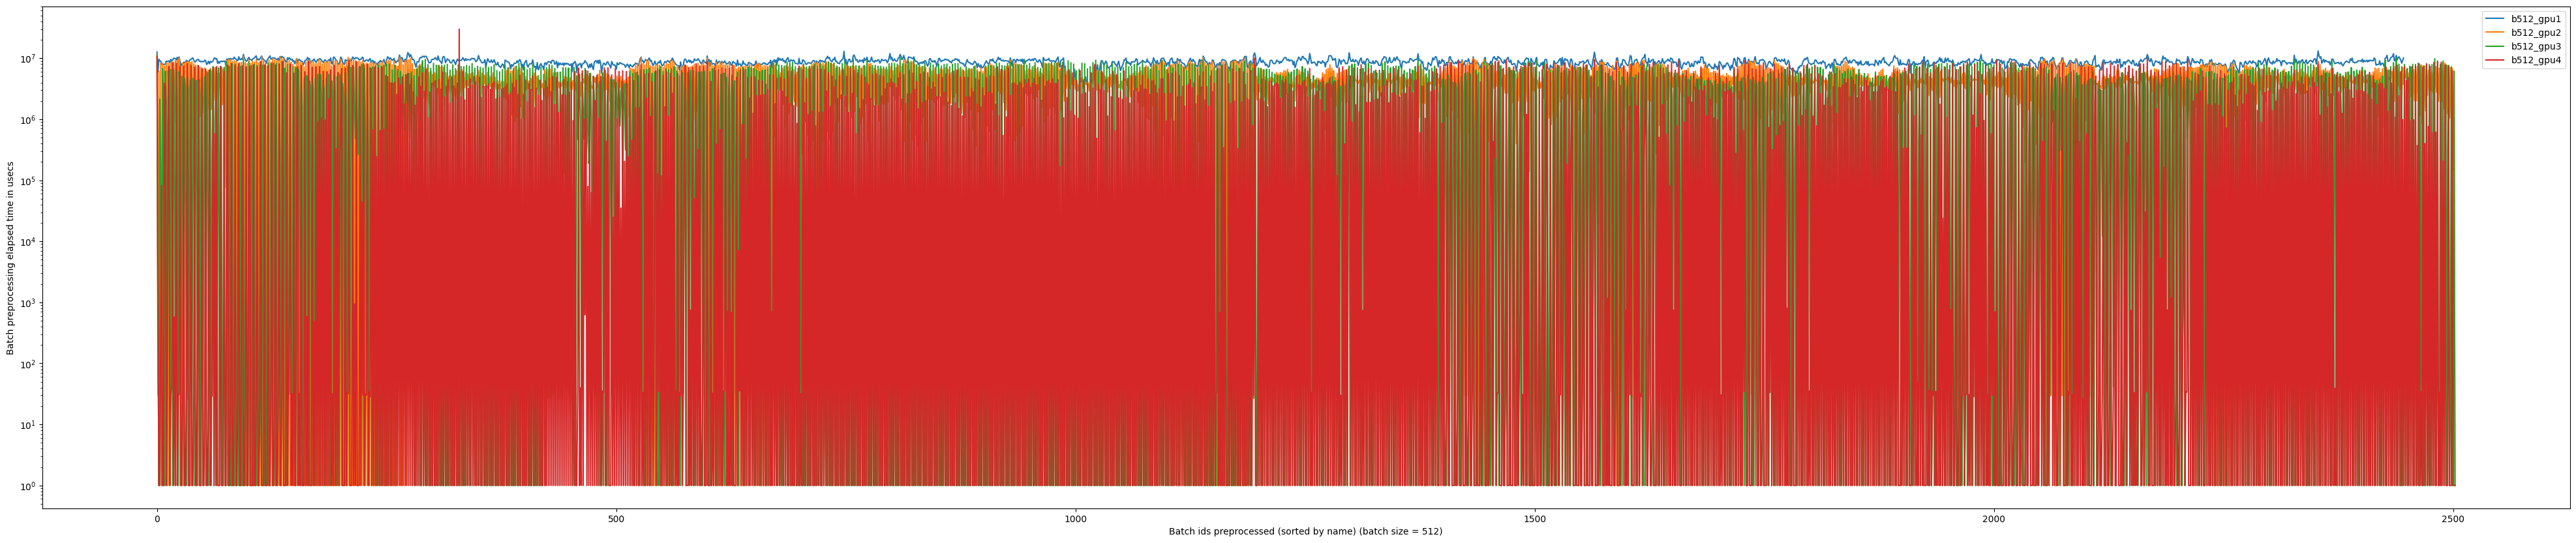

avg = 17320772.52 usecs, std = 1868934.72 (10.79% of avg) usecs, min = 8368359.68 usecs, max = 24163196.46 usecs
0.00% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b1024_gpu2
b1024_gpu2:
avg = 8378217.82 usecs, std = 5742921.09 (68.55% of avg) usecs, min = 1.00 usecs, max = 22218730.91 usecs
10.62% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b1024_gpu3
b1024_gpu3:
avg = 4488201.92 usecs, std = 4119035.04 (91.77% of avg) usecs, min = 1.00 usecs, max = 22780954.34 usecs
14.06% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/b1024_gpu4
b1024_gpu4:
avg = 3763235.94 usecs, std = 2821927.07 (74.99% of avg) usecs, min = 1.00 usecs, max = 18200656.18 usecs
15.73% of batches had wait time < 100 usecs
/home/mayurpl/sem_2/special_problems/ml_profiling/pace_logs/results/e2e


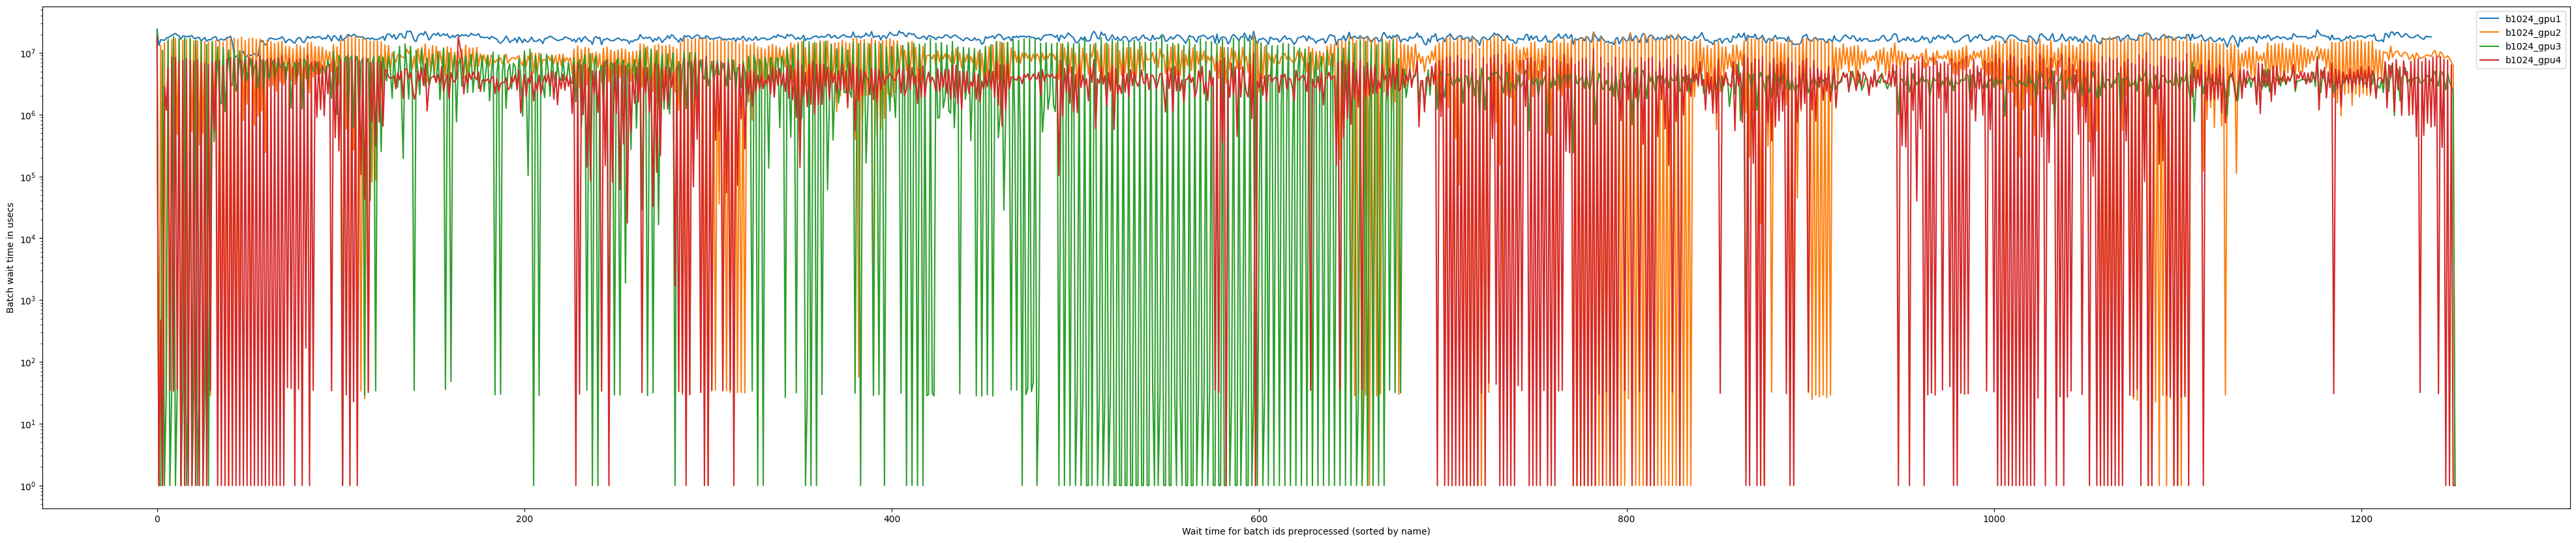

In [10]:
plotter_preprocessing_wait_time(imagenet_target_dir,sort_by='name')

In [ ]:
plotter_preprocessing_wait_time(synthetic_target_dir,sort_by=sort_criteria,fig_size=(20,10),fig_prefix='synthetic')